In [1]:
import pymongo
import numpy as np

from pymongo import MongoClient

import pandas as pd
from pandas.io.json import json_normalize
import plotly.plotly as py
import plotly.graph_objs as go

from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib as mpl


In [10]:
client = MongoClient('54.202.134.219', 27017)
db = client['azure_kube_linearConstant']


In [158]:
datapoints = list(db.kubernetesData.find({}))

In [159]:
df = json_normalize(datapoints)

In [124]:
df['time'] = pd.to_datetime(df['time'],unit='ms')

In [160]:
df2 = pd.DataFrame(df['data.rpcInfo'])

In [162]:
df2[['rpc1','rpc2']] = pd.DataFrame(df2['data.rpcInfo'].values.tolist(), index= df2.index)

In [163]:
df3 = pd.DataFrame(df2['data.rpcInfo'].values.tolist(), columns=['rpc1','rpc2'])

In [164]:
df3.head()

,rpc1,rpc2
0,"{'observedGeneration': 38, 'namespace': 'defau...","{'observedGeneration': 1, 'namespace': 'kube-s..."
1,"{'observedGeneration': 38, 'namespace': 'defau...","{'observedGeneration': 1, 'namespace': 'kube-s..."
2,"{'observedGeneration': 38, 'namespace': 'defau...","{'observedGeneration': 1, 'namespace': 'kube-s..."
3,"{'observedGeneration': 38, 'namespace': 'defau...","{'observedGeneration': 1, 'namespace': 'kube-s..."
4,"{'observedGeneration': 38, 'namespace': 'defau...","{'observedGeneration': 1, 'namespace': 'kube-s..."


In [165]:
list1= df3['rpc1'].values.tolist()

In [166]:
rpcInfoDf = json_normalize(list1)

In [172]:
rpcInfoDf['time'] = pd.to_datetime(df['time'], unit='ms')

In [173]:
rpcInfoDf

,availableReplicas,creationTimestamp,fullyLabeledReplicas,name,namespace,observedGeneration,readyReplicas,replicas,time
0,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:18.088
1,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:20.096
2,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:22.098
3,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:26.101
4,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:28.103
5,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:24.099
6,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:34.108
7,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:32.107
8,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:30.105
9,1,2017-12-22T15:48:51Z,1,movie-deployment,default,38,1,1,2017-12-23 06:15:36.116


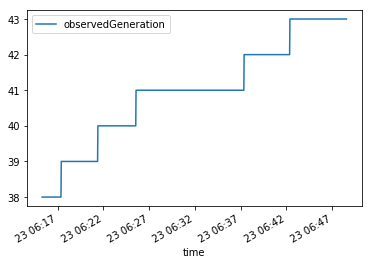

In [196]:
rpcInfoDf.plot(x='time', y='observedGeneration')

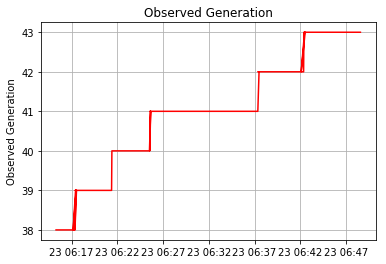

In [197]:
plt.plot_date(x=rpcInfoDf['time'], y=rpcInfoDf['observedGeneration'], fmt="r-")
plt.title("Observed Generation")
plt.ylabel("Observed Generation")
plt.grid(True)
plt.show()

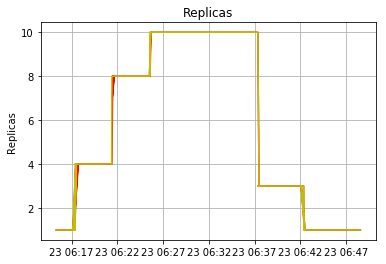

In [198]:
plt.plot_date(x=rpcInfoDf['time'], y=rpcInfoDf['availableReplicas'], fmt="r-")
plt.plot_date(x=rpcInfoDf['time'], y=rpcInfoDf['fullyLabeledReplicas'], fmt="y-") #desired
plt.title("Replicas")
plt.ylabel("Replicas")
plt.grid(True)
plt.show()

In [201]:
hpadf= pd.DataFrame(df['data.hpaInfo'])
hpadf[['hpa1']] = pd.DataFrame(hpadf['data.hpaInfo'].values.tolist(), index= hpadf.index)
hpaInfodf = pd.DataFrame(hpadf['data.hpaInfo'].values.tolist(), columns=['hpa1'])
list1= hpaInfodf['hpa1'].values.tolist()
hpaInfoDf = json_normalize(list1)
hpaInfoDf['time'] = pd.to_datetime(df['time'], unit='ms')
hpaInfoDf.head()


,creationTimestamp,currentCPUUtilizationPercentage,currentReplicas,desiredReplicas,lastScaleTime,maxReplicas,minReplicas,name,namespace,statsCurrent,status,targetCPUUtilizationPercentage,time
0,2017-12-22T15:48:52Z,0,1,1,2017-12-23T05:52:23Z,10,1,movie-deployment,default,"[{'type': 'Resource', 'currentAverageUtilizati...","[{'type': 'ScalingActive', 'lastTransitionTime...",20,2017-12-23 06:15:18.088
1,2017-12-22T15:48:52Z,0,1,1,2017-12-23T05:52:23Z,10,1,movie-deployment,default,"[{'type': 'Resource', 'currentAverageUtilizati...","[{'type': 'ScalingActive', 'lastTransitionTime...",20,2017-12-23 06:15:20.096
2,2017-12-22T15:48:52Z,0,1,1,2017-12-23T05:52:23Z,10,1,movie-deployment,default,"[{'type': 'Resource', 'currentAverageUtilizati...","[{'type': 'ScalingActive', 'lastTransitionTime...",20,2017-12-23 06:15:22.098
3,2017-12-22T15:48:52Z,0,1,1,2017-12-23T05:52:23Z,10,1,movie-deployment,default,"[{'type': 'Resource', 'currentAverageUtilizati...","[{'type': 'ScalingActive', 'lastTransitionTime...",20,2017-12-23 06:15:26.101
4,2017-12-22T15:48:52Z,0,1,1,2017-12-23T05:52:23Z,10,1,movie-deployment,default,"[{'type': 'Resource', 'currentAverageUtilizati...","[{'type': 'ScalingActive', 'lastTransitionTime...",20,2017-12-23 06:15:28.103


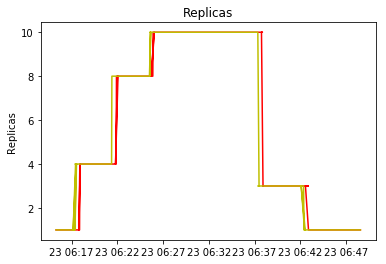

In [214]:
plt.plot_date(x=hpaInfoDf['time'], y=hpaInfoDf['currentReplicas'], fmt="r-")
plt.plot_date(x=hpaInfoDf['time'], y=hpaInfoDf['desiredReplicas'], fmt="y-") #desired

plt.title("Replicas")
plt.ylabel("Replicas")
plt.show()

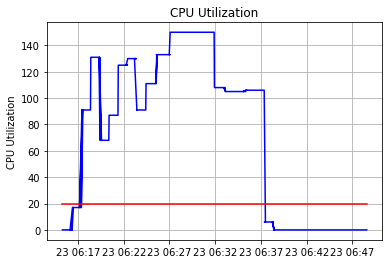

In [211]:
plt.plot_date(x=hpaInfoDf['time'], y=hpaInfoDf['currentCPUUtilizationPercentage'], fmt="b-")
plt.plot_date(x=hpaInfoDf['time'], y=hpaInfoDf['targetCPUUtilizationPercentage'], fmt="r-") #target

plt.title("CPU Utilization")
plt.ylabel("CPU Utilization")
plt.grid(True)
plt.show()